In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime

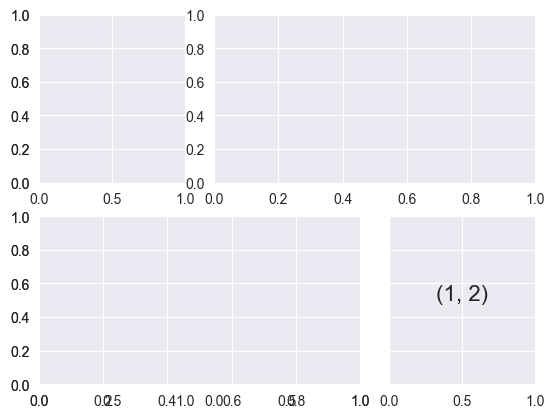

In [3]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') #2 строки, 3 столбцаf

for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i,j)), fontsize=16, ha='center')


grid = plt.GridSpec(2,3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.show()

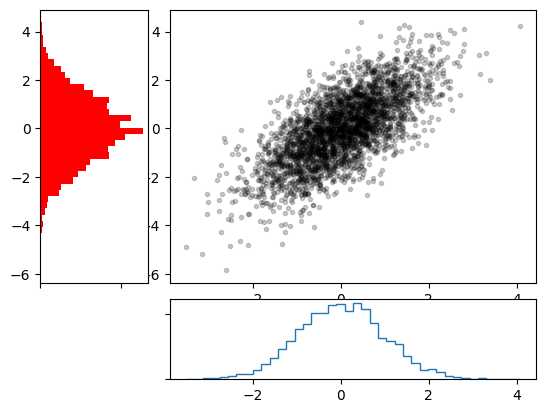

In [46]:
mean =[0,0]
cov = [[1,1], [1,2]]

rng = np.random.default_rng(1)
x, y = rng.multivariate_normal(mean, cov, 3000).T

fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)

x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

y_hist.hist(y, 40, orientation='horizontal', color='red')
x_hist.hist(x, 40, orientation='vertical', histtype='step')
plt.show()


            year  month  day gender  births
1969-01-01  1969      1    1      F    4046
1969-01-01  1969      1    1      M    4440
1969-01-02  1969      1    2      F    4454
1969-01-02  1969      1    2      M    4548
1969-01-03  1969      1    3      F    4548


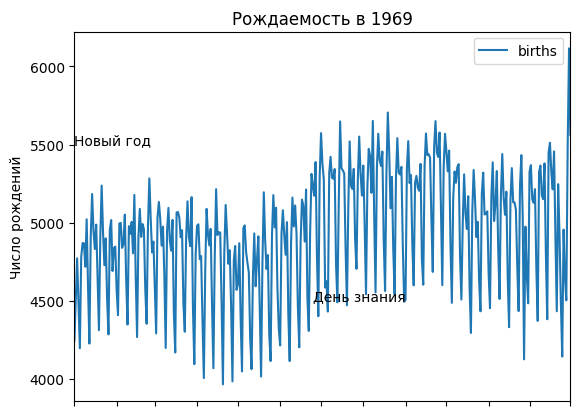

In [59]:
births = pd.read_csv('./data/births-1969.csv')
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format="%Y%m%d")

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
print(births.head())

births_by_date.index = [
    datetime(1969, month, day) for (month, day) in births_by_date.index
]

fig, ax = plt.subplots()
births_by_date.plot(ax=ax)

ax.text('1969-01-01', 5500, 'Новый год')
ax.text('1969-09-01', 4500, "День знания", ha='right')
ax.set(title='Рождаемость в 1969', ylabel='Число рождений')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonth=5))

plt.show()

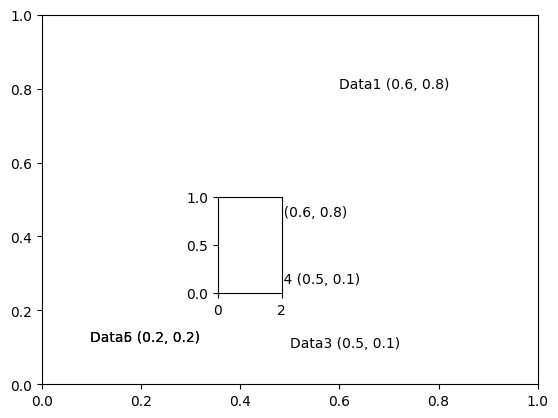

In [74]:
fig = plt.figure()
ax1 = plt.axes()
ax2 = plt.axes((0.4, 0.3, 0.1, 0.2))

ax2.set_xlim(0, 2)
ax1.text(0.6, 0.8, 'Data1 (0.6, 0.8)', transform=ax1.transData)
ax1.text(0.6, 0.8, 'Data2 (0.6, 0.8)', transform=ax2.transData)

ax1.text(0.5, 0.1, 'Data3 (0.5, 0.1)', transform=ax1.transAxes)
ax1.text(0.5, 0.1, 'Data4 (0.5, 0.1)', transform=ax2.transAxes)

ax1.text(0.2, 0.2, 'Data5 (0.2, 0.2)', transform=fig.transFigure)
ax1.text(0.2, 0.2, 'Data6 (0.2, 0.2)', transform=fig.transFigure)
plt.show()

Text(2, -6, 'Локальный минимум')

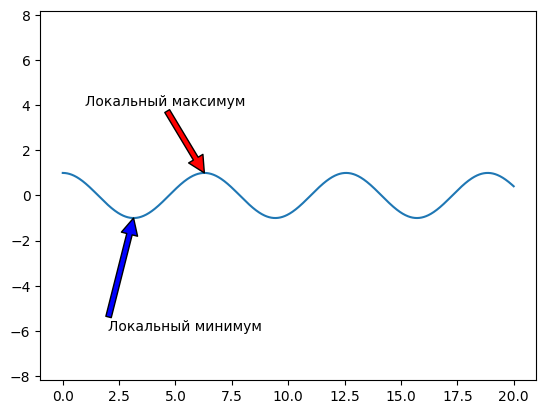

In [77]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('Локальный максимум', xy = (6.28, 1), xytext=(1, 4), arrowprops=dict(facecolor= 'red'))

ax.annotate('Локальный минимум', xy = (3.14, -1), xytext=(2, -6), arrowprops=dict(facecolor= 'blue'))

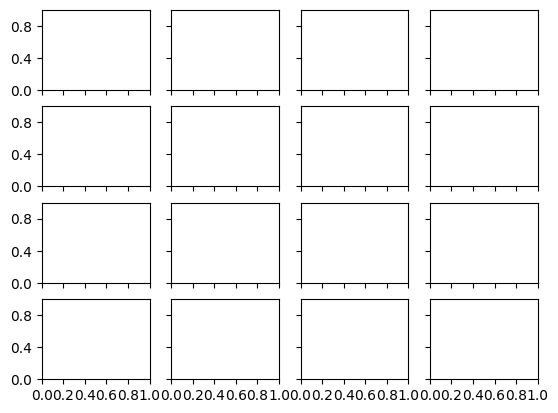

In [80]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

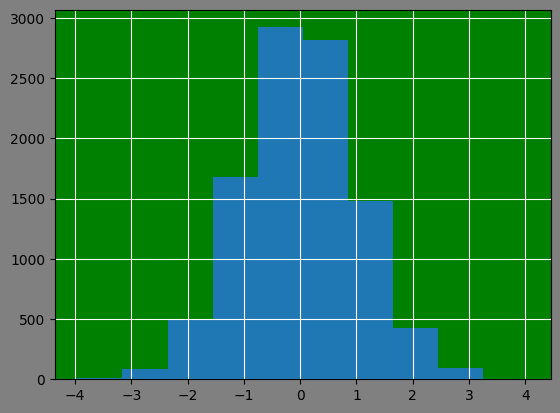

In [90]:

x = np.random.randn(10000)
fig = plt.figure(facecolor='gray')
ax = plt.axes(facecolor='green')
plt.grid(color='w', linestyle='solid')

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

with plt.style.context('bmh'):
    plt.hist(x)

plt.show()